# TrafficSignClassification

In [2]:
import  matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pickle 
import random
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
train_path='/content/drive/My Drive/Traffic-Sign-Classification/traffic-signs-data/

# Loading the data as train, test & valadition.

In [31]:
#import train data
with open('/content/drive/My Drive/Traffic-Sign-Classification/traffic-signs-data/train.p', 'rb') as f:
    train_data = pickle.load(f)
    
with open('/content/drive/My Drive/Traffic-Sign-Classification/traffic-signs-data/valid.p', 'rb') as f:
    val_data = pickle.load(f)
with open('/content/drive/My Drive/Traffic-Sign-Classification/traffic-signs-data/test.p', 'rb') as f:
    test_data = pickle.load(f)
    


In [32]:
X_train, y_train = train_data['features'], train_data['labels']
X_val, y_val = val_data['features'], val_data['labels']
X_test, y_test = test_data['features'], test_data['labels']

In [33]:
print("Training data features shape",X_train.shape,"lables",y_train.shape)
print("Test data features  shape",X_test.shape,"lables",y_test.shape)
print("validation features data shpe",X_val.shape,"lables",y_val.shape)

Training data features shape (34799, 32, 32, 3) lables (34799,)
Test data features  shape (12630, 32, 32, 3) lables (12630,)
validation features data shpe (4410, 32, 32, 3) lables (4410,)


# Visualising the data

(32, 32, 3)


2

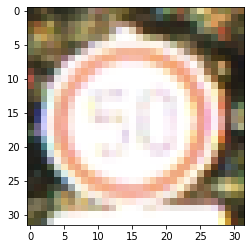

In [6]:
i=np.random.randint(1,len(X_train))
plt.imshow(X_train[i])
print(X_train[i].shape)
y_train[i]

In [7]:
data = pd.read_csv('signnames.csv')
num_of_samples=[]
 
cols = 5
num_classes = 43
 
fig, axs = plt.subplots(nrows=num_classes, ncols=cols, figsize=(5,50))
fig.tight_layout()
 
for i in range(cols):
    for j, row in data.iterrows():
      x_selected = X_train[y_train == j]
      axs[j][i].imshow(x_selected[random.randint(0,(len(x_selected) - 1)), :, :], cmap=plt.get_cmap('gray'))
      axs[j][i].axis("off")
      if i == 2:
        axs[j][i].set_title(str(j) + " - " + row["SignName"])
        num_of_samples.append(len(x_selected))


FileNotFoundError: ignored

[180, 1980, 2010, 1260, 1770, 1650, 360, 1290, 1260, 1320, 1800, 1170, 1890, 1920, 690, 540, 360, 990, 1080, 180, 300, 270, 330, 450, 240, 1350, 540, 210, 480, 240, 390, 690, 210, 599, 360, 1080, 330, 180, 1860, 270, 300, 210, 210]


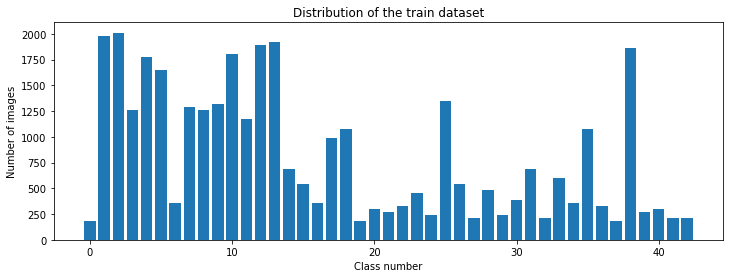

In [ ]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the train dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")
plt.show()



(34799, 32, 32, 3)


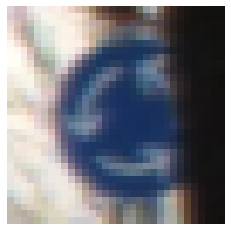

In [34]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)


(32, 32, 3)
36


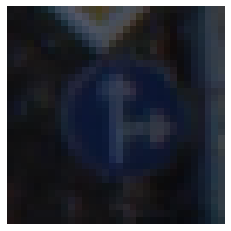

In [35]:
import cv2
 
plt.imshow(X_train[1000])
plt.axis("off")
print(X_train[1000].shape)
print(y_train[1000])


In [36]:
def grayscale(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img



(32, 32)


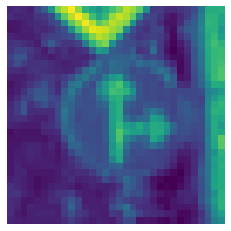

In [37]:
img = grayscale(X_train[1000])
plt.imshow(img)
plt.axis("off")
print(img.shape)


In [38]:
def equalize(img):
    img = cv2.equalizeHist(img)
    return img


(32, 32)


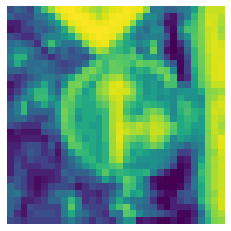

In [39]:
img = equalize(img)
plt.imshow(img)
plt.axis("off")
print(img.shape)


In [42]:
def preprocess(img):
    #img = grayscale(img)
    #img = equalize(img)
    img = img/255
    return img


In [43]:
X_train = np.array(list(map(preprocess, X_train)))
X_test = np.array(list(map(preprocess, X_test)))
X_val = np.array(list(map(preprocess, X_val)))


(34799, 32, 32, 3)


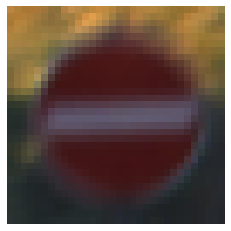

In [44]:
plt.imshow(X_train[random.randint(0, len(X_train) - 1)])
plt.axis('off')
print(X_train.shape)


In [21]:
X_train = X_train.reshape(34799, 32, 32,1)
X_test = X_test.reshape(12630, 32, 32,1)
X_val = X_val.reshape(4410, 32, 32,1)


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.2,
                            shear_range=0.1,
                            rotation_range=10.)


In [46]:
datagen.fit(X_train)
batches = datagen.flow(X_train, y_train, batch_size = 15)
X_batch, y_batch = next(batches)


(15, 32, 32, 3)


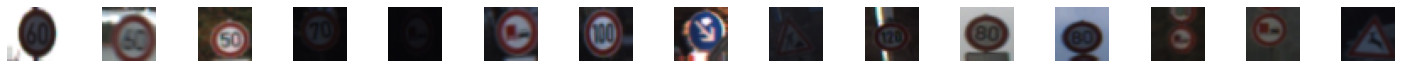

In [48]:
fig, axs = plt.subplots(1, 15, figsize=(20, 5))
fig.tight_layout()
 
for i in range(15):
    axs[i].imshow(X_batch[i].reshape(32, 32,3))
    axs[i].axis("off")
 
print(X_batch.shape)



In [49]:
from tensorflow.keras import utils as np_utils

In [50]:
y_train = np_utils.to_categorical(y_train, 43)
y_test = np_utils.to_categorical(y_test, 43)
y_val = np_utils.to_categorical(y_val, 43)


# MODEL CREATION -LENET

In [61]:
def modified_model():
  model = Sequential()
  model.add(layers.Conv2D(60, (5, 5), input_shape=(32, 32, 3), activation='relu',padding='sane'))
  model.add(layers.Conv2D(60, (5, 5), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  
  model.add(layers.Conv2D(30, (3, 3), activation='relu'))
  model.add(layers.Conv2D(30, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D(pool_size=(2, 2)))
  
  model.add(layers.Flatten())
  model.add(layers.Dense(500, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(43, activation='softmax'))
  
  model.compile(keras.optimizers.Adam(lr = 0.001), loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [105]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=X_train[0].shape, padding='same'), #C1
    keras.layers.MaxPooling2D(), #S2
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='same'), #C3
    keras.layers.MaxPooling2D(), #S4
    keras.layers.Conv2D(32, kernel_size=3, strides=1, activation='tanh', padding='same'), #C3
    keras.layers.MaxPooling2D(), #S4
    keras.layers.Flatten(), #Flatten
    keras.layers.Dense(120, activation='tanh'), #C5
    keras.layers.Dense(84, activation='tanh'), #F6
    keras.layers.Dense(43, activation='softmax') #Output layer
])

In [106]:
lenet_5_model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [107]:
lenet_hist=lenet_5_model.fit(X_train, y_train, epochs=10,batch_size=16, validation_data=(X_val, y_val))

Epoch 1/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.7225 - accuracy: 0.8020 - val_loss: 0.3913 - val_accuracy: 0.8855
Epoch 2/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.1034 - accuracy: 0.9729 - val_loss: 0.3214 - val_accuracy: 0.9043
Epoch 3/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.0534 - accuracy: 0.9856 - val_loss: 0.2934 - val_accuracy: 0.9120
Epoch 4/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.0405 - accuracy: 0.9883 - val_loss: 0.3363 - val_accuracy: 0.9082
Epoch 5/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.0330 - accuracy: 0.9901 - val_loss: 0.3489 - val_accuracy: 0.9120
Epoch 6/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.0260 - accuracy: 0.9922 - val_loss: 0.3904 - val_accuracy: 0.8946
Epoch 7/10
2175/2175 [==============================] - 8s 4ms/step - loss: 0.0223 - accuracy: 0.9933 - val_loss: 0.3999 - val_accuracy:

In [62]:
from keras.models import Sequential
from tensorflow import keras
model=modified_model()

In [59]:
from tensorflow.keras import layers,datasets,models


In [82]:
history = model.fit(X_train, y_train, batch_size=16, epochs=4, validation_data=(X_val, y_val))

Epoch 1/4
2175/2175 [==============================] - 9s 4ms/step - loss: 0.0321 - accuracy: 0.9922 - val_loss: 0.1388 - val_accuracy: 0.9776
Epoch 2/4
2175/2175 [==============================] - 9s 4ms/step - loss: 0.0273 - accuracy: 0.9930 - val_loss: 0.2268 - val_accuracy: 0.9755
Epoch 3/4
2175/2175 [==============================] - 9s 4ms/step - loss: 0.0317 - accuracy: 0.9925 - val_loss: 0.2369 - val_accuracy: 0.9694
Epoch 4/4
2175/2175 [==============================] - 9s 4ms/step - loss: 0.0294 - accuracy: 0.9930 - val_loss: 0.2528 - val_accuracy: 0.9712


Text(0.5, 0, 'epoch')

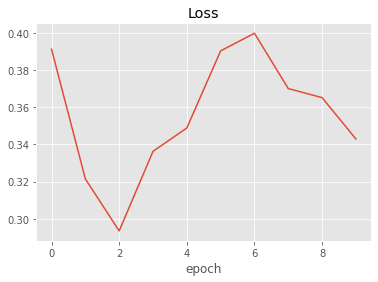

In [109]:
#plt.plot(history.history['loss'])
plt.plot(lenet_hist.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')


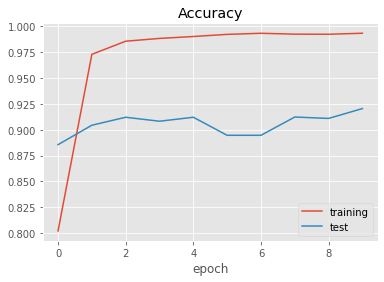

In [110]:
plt.plot(lenet_hist.history['accuracy'])
plt.plot(lenet_hist.history['val_accuracy'])
plt.legend(['training','test'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.style.use('ggplot')


In [108]:
score=lenet_5_model.evaluate(X_test,y_test)

395/395 [==============================] - 1s 3ms/step - loss: 0.4507 - accuracy: 0.9036


In [100]:
score

[0.4421541094779968, 0.8955661058425903]

In [111]:
lenet_hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [112]:
accuracy=lenet_hist.history['accuracy']
loss=lenet_hist.history['loss']
val_loss=lenet_hist.history['val_loss']
val_accuracy=lenet_hist.history['val_accuracy']

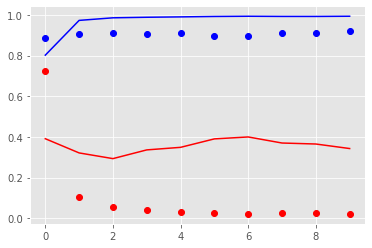

In [113]:
epochs=range(len(accuracy))
plt.plot(epochs,loss,'ro',label="Training Loss")
plt.plot(epochs,val_loss,'r',label="validation Loss")
plt.plot(epochs, val_accuracy,'bo',label="validation accuracy")
plt.plot(epochs,accuracy,'b',label="accuracy")
plt.savefig('graph')

In [71]:
predicted_classes=model.predict_classes(X_test)
predicted_classes[0]

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


16

In [73]:
y_true=y_test

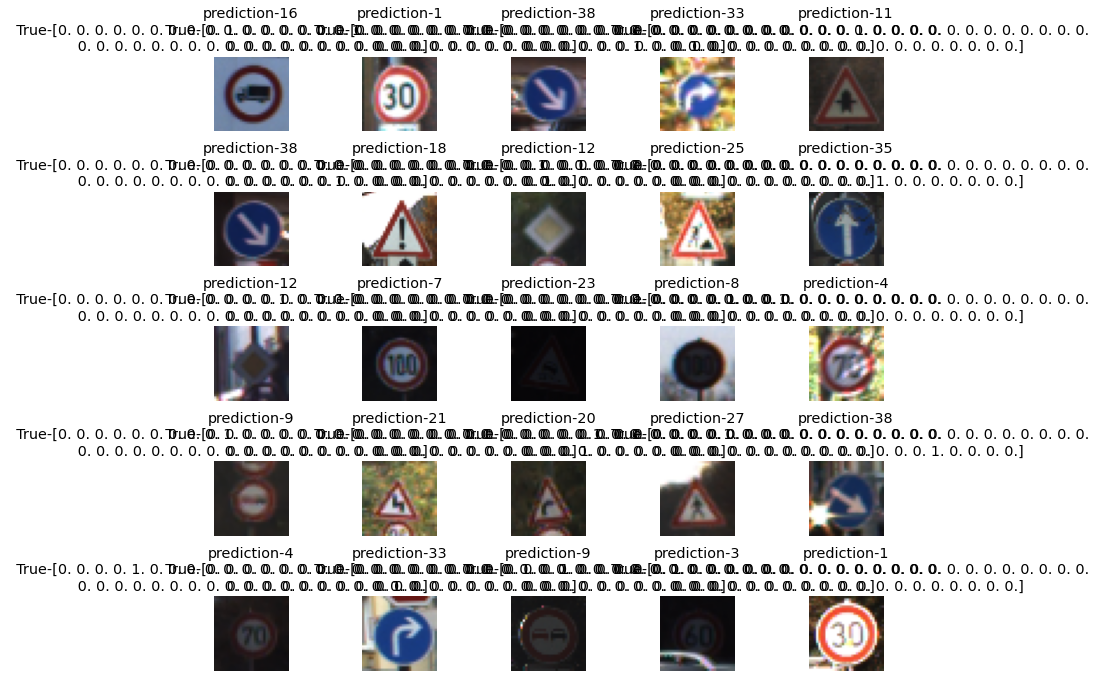

In [74]:
l=5
w=5
fig,axes=plt.subplots(l,w,figsize=(12,12))
axes=axes.ravel()
for i in np.arange(0,l*w):
  axes[i].imshow(X_test[i])
  axes[i].set_title('prediction-{}\n  True-{}'.format(predicted_classes[i],y_true[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)
